In [1]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#ścieżki do katalogów

species1_dir = 'your_directory'
species2_dir = 'your_directory'
species3_dir = 'your_directory'
negative_dir = 'your_directory'

#określenie wspólnego rozmiaru obrazu
img_size = (300, 300)

#lista do przechowywania danych obrazu i etykiet
data = []
labels = []


    
#gatunki
for img_file in os.listdir(species1_dir):
    img_path = os.path.join(species1_dir, img_file)
    img = Image.open(img_path).resize(img_size)
    img_data = np.array(img)
    data.append(img_data)
    labels.append(0)


for img_file in os.listdir(species2_dir):
    img_path = os.path.join(species2_dir, img_file)
    img = Image.open(img_path).resize(img_size)
    img_data = np.array(img)
    data.append(img_data)
    labels.append(1)


for img_file in os.listdir(species3_dir):
    img_path = os.path.join(species3_dir, img_file)
    img = Image.open(img_path).resize(img_size)
    img_data = np.array(img)
    data.append(img_data)
    labels.append(2)
    
#obrazy
for img_file in os.listdir(negative_dir):
    img_path = os.path.join(negative_dir, img_file)
    img = Image.open(img_path).resize(img_size)
    img_data = np.array(img)
    data.append(img_data)
    labels.append(3)

#konwwertowanie danych na etykiety i tablice numpy
data = np.array(data)
labels = np.array(labels)

#dzielenie zbioru danych na zbiór treningowy i testowy
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

#normalizacja wartości pikseli
train_data = train_data / 255.0
test_data = test_data / 255.0


class_labels = ['Blotniarka', 'Helenka', 'Winniczek', 'Negative']

#binarna reprezentacja wektorowa
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=len(class_labels))
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=len(class_labels))

#Generator danych obrazu
datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='nearest')

#dopasowanie generatora danych do danych treningowych
datagen.fit(train_data)

In [ ]:
import tensorflow as tf
import time
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.callbacks import TensorBoard
#CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels), activation='softmax')
])



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(patience=12)
#trening modelu


history = model.fit(train_data, train_labels, batch_size=8, epochs=20, callbacks=[early_stop], validation_data=(test_data, test_labels))



#ocena modelu
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc)


In [3]:
#zapisywanie modelu
model.save('m3N_64_20.h5')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

#załaduj wytrenowany model
model = load_model('m1_8_20.h5')

#załaduj obraz do sklasyfikowania
img_path = 'winniczek5.jpg'
img = image.load_img(img_path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

#normalizacja obrazu
x = x / 255.0

#predykcja
prediction = model.predict(x)

#wyświetlanie obrazu
plt.imshow(img)
#przewidywana etykieta klasy
class_names = ['Blotniarka', 'Helenka', 'Winniczek', 'Negative']
predicted_class = np.argmax(prediction)
predicted_name = class_names[predicted_class]

print(f"Predicted class: {predicted_name})


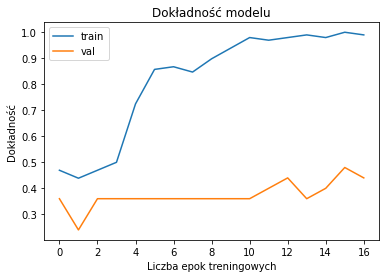

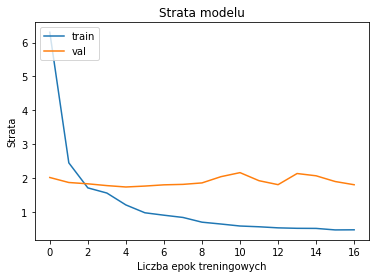

In [4]:
import matplotlib.pyplot as plt

#dokładność
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Dokładność modelu')
plt.xlabel('Liczba epok treningowych')
plt.ylabel('Dokładność')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('wykresy/accuracy_m3N_64_20.jpg')

#strata
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Strata modelu')
plt.xlabel('Liczba epok treningowych')
plt.ylabel('Strata')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('wykresy/loss_m3N_64_20.jpg')


In [ ]:
#podsumowanie modelu
model.summary()

In [ ]:
#precyzja, czułość, F1
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

#załaduj model z pliku .h5
model = load_model('m1_32_20.h5')

y_pred = model.predict(test_data)

y_pred = np.argmax(y_pred, axis=1)
test_labels = np.argmax(test_labels, axis=1)

print(classification_report(test_labels, y_pred, target_names=class_labels))
